In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import plotly.graph_objects as go
from IPython.display import HTML
from scipy.optimize import curve_fit
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.animation import FuncAnimation, FFMpegWriter

from gyroscope import Solve_Gyro, Solve_Gyro_Forced_X, Solve_Gyro_Forced_XY, Solve_Gyro_Forced_Y, Solve_Gyro_Free, Get_Gyro_Position
from gyroscope import Get_Gyro_Position_X, Demo

Precession frequency = 0.26491303213292194
Rotation frequency = 199.96717511270765
Gyros number (frequency) = 754.8408377749146
Gyros number (parameters) = 755.2479452225622
Gyros number gap = 0.053903814002120146 %
Larmor frequency =  0.26477023390481363  Hz


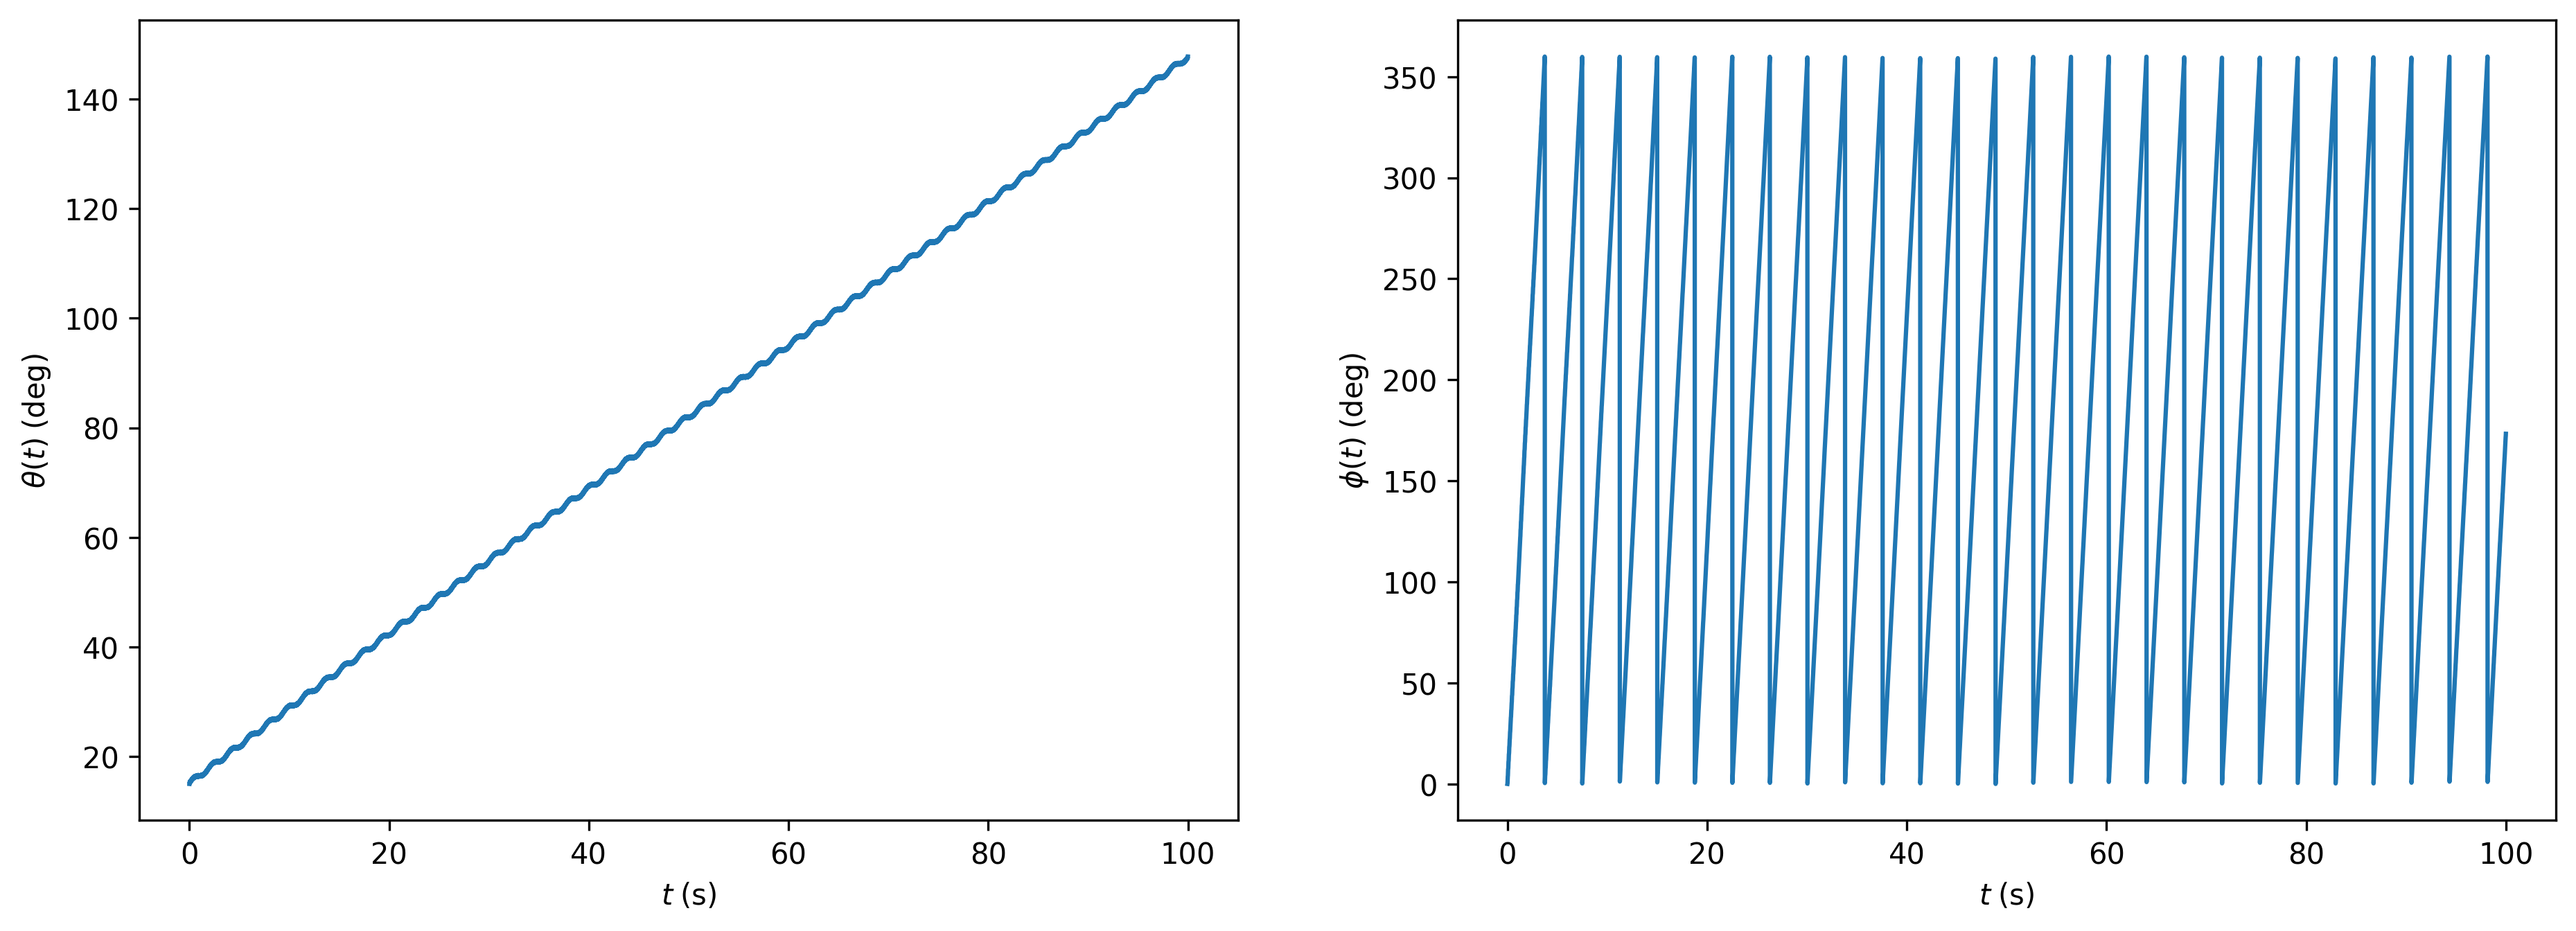

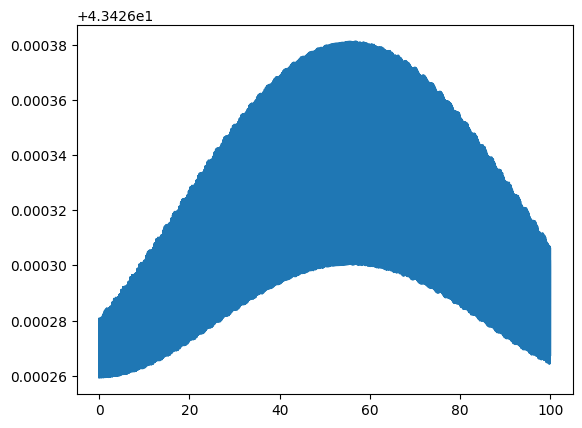

In [115]:
CI = [np.pi / 12, 0, 0, 0, 0, 2*np.pi*200]

t = np.linspace(0, 300, 10000)
t = np.linspace(0, 100, 10000)

g_ = 9.81
r = 53 / 2 * 1e-3
e = 12 * 1e-3
m_ = 0.375
#J3_ = m_ * (r**2) / 2
#J1_ = J3_ + m_ * e**2 / 12
J3_ = 0.000055
J1_ = 0.000055
h_ = 31.25 * 1e-3

x0_ = 10 * 1e-2
omega_f =  0.265
params_f = [g_, m_, h_, J1_, J3_, x0_, np.pi,  omega_f]



the, phi, psi, theD, phiD, psiD, _, _, _, path_f = Solve_Gyro_Forced_X(t, CI, params_f)


p_phi = J1_ * np.sin(the)**2 * phiD + J3_ * np.cos(the) * (psiD + phiD * np.cos(the))
p_psi = J3_ * (psiD + phiD * np.cos(the))

N = 0.5 * J1_ * (np.sin(the) * phiD)**2 + p_psi**2 / (2 * J3_) + 0.5 * J1_ * theD**2

plt.figure()
plt.plot(t, N)



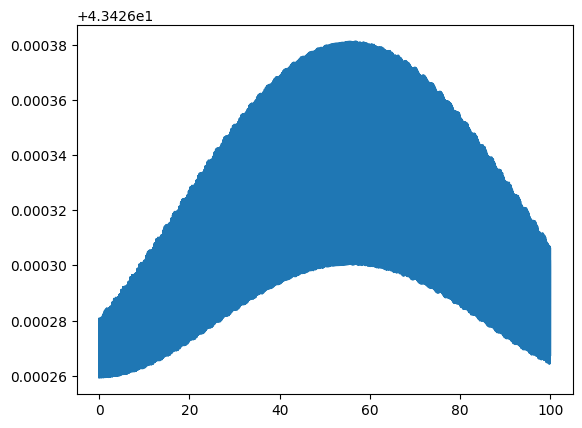

In [81]:
N = 0.5 * J1_ * (np.sin(the) * phiD)**2  + 0.5 * J1_ * theD**2  +  p_psi**2 / (2 * J3_)

plt.figure()
plt.plot(t, N)

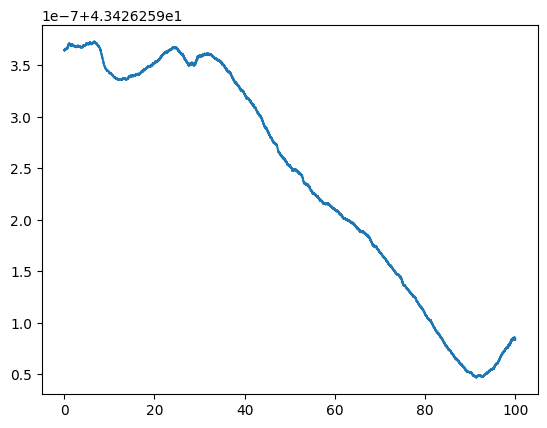

In [82]:
plt.figure()
plt.plot(t, p_psi**2 / (2 * J3_))

In [83]:
np.max(p_psi[777]**2 / (2 * J3_))

43.42625936747326

In [84]:
tab = np.std(p_psi**2 / (2 * J3_), ddof=1)
tab

1.1268485635590585e-07

8.96717596448738e-11


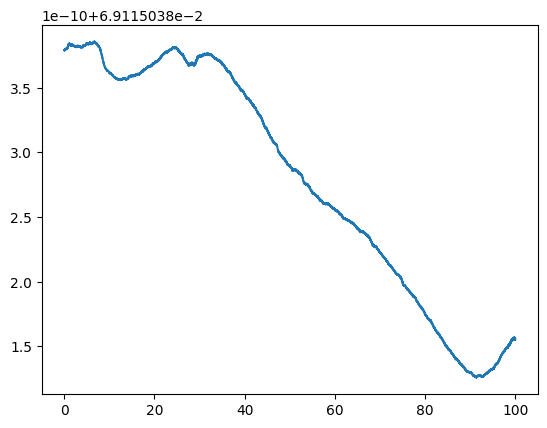

In [85]:
plt.figure()
plt.plot(t, p_psi)
print(np.std(p_psi, ddof=1))

1.1617514359556602
1.6270457225951385


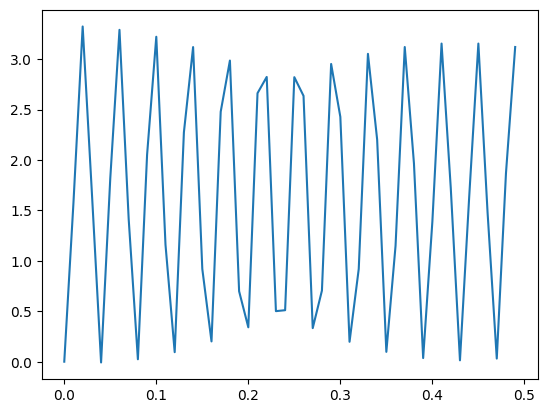

In [86]:
plt.figure()
plt.plot(t[:50], phiD[:50])
print(np.std(phiD[:50], ddof=1))
print(np.mean(phiD[:50]))

48.05721248037247
83.41787044150415


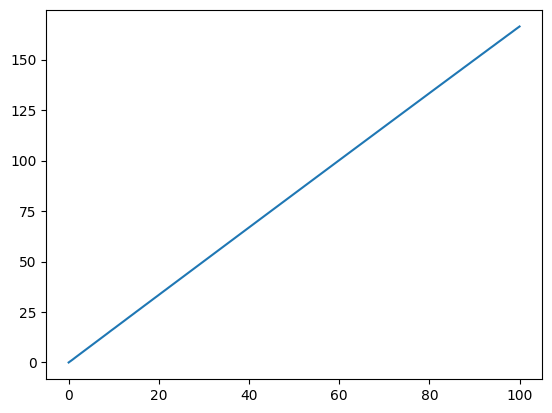

In [87]:
plt.figure()
plt.plot(t, phi)
print(np.std(phi, ddof=1))
print(np.mean(phi))

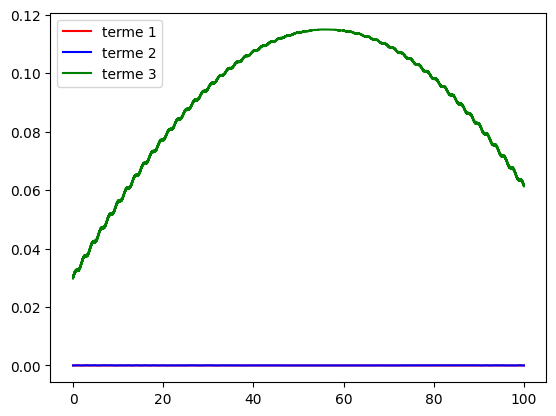

In [93]:
plt.figure()
plt.plot(t, np.abs(J1_ * np.sin(the)*np.cos(the)*(0.264**2)), 'r', label='terme 1' )
plt.plot(t, np.abs( (omega_f**2)*np.sin(phi)*np.cos(the) * np.sin(phi) * m_ * h_ * x0_) , 'b', label='terme 2')
plt.plot(t, np.abs(  m_*g_*h_*np.sin(the)  ), 'g', label='terme 3'  )
plt.legend()
plt.show()

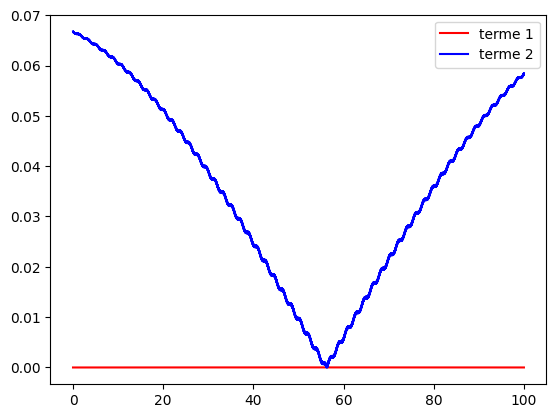

In [89]:
plt.figure()
plt.plot(t, J1_ * 0.264 * np.sin(the)**2, 'r', label='terme 1' )
plt.plot(t, np.abs(np.mean(p_psi) * np.cos(the)) , 'b', label='terme 2')
plt.legend()
plt.show()

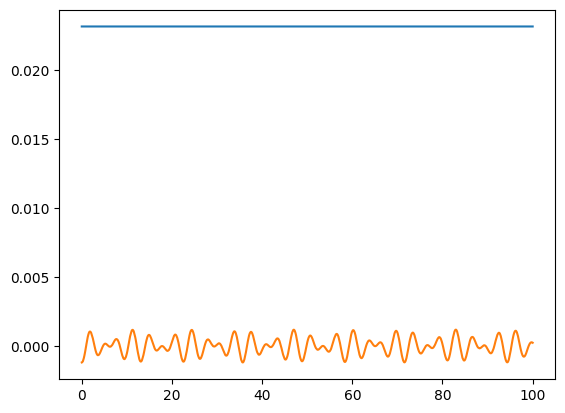

In [106]:
p_psi_corr = np.mean(psiD + np.cos(the) * 0.264)
p_psi_corr = 200 * 2 * np.pi + np.cos(the) * 0.264

plt.figure()
plt.plot(t, np.ones(len(t)) * np.mean(theD[ t <= 100]))
plt.plot(t, m_*x0_*h_*(omega_f**2)*np.cos(omega_f*t+np.pi)*np.cos(phi) / (p_psi - 2 * J1_ * np.cos(the) * 0.264 ))
plt.show()

In [67]:
2 * np.pi / np.mean(theD[ t <= 100])

273.3218931997515

In [68]:
2 * np.pi / np.mean(theD[ (t >= 150) & (t <= 200)])

-273.9232395249994

In [111]:
np.mean(theD[ t <= 100])

0.023168360269250222

In [110]:
np.mean(p_psi)

0.06911503827956045

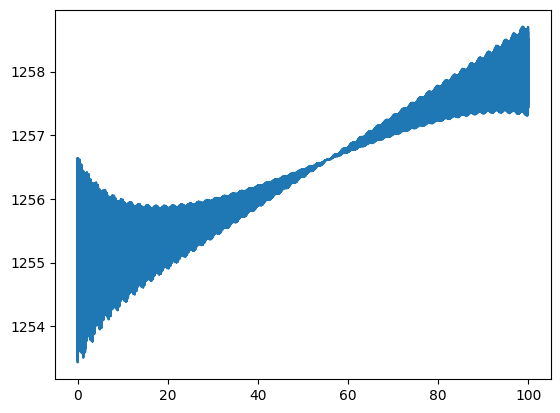

In [112]:
plt.figure()
plt.plot(t, psiD)

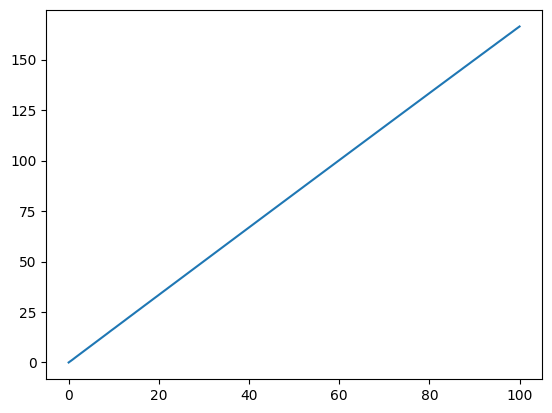

In [113]:
plt.plot(t, psi)